In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.optimize import root_scalar
np.seterr(invalid="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [38]:
D = 0.5     #seperation of two adjacent wells  
L = 2       #width of a single well  
gamma  = 50 #absolute value of the depth of the well / unitless 
gamma1 = 0

(-51.0, 2.0)


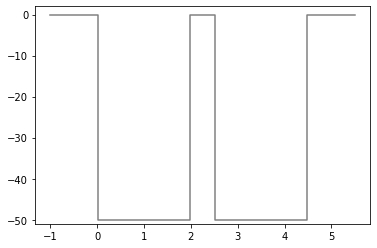

In [39]:
def V(x, V0=-gamma,V1 = -gamma1): #construction of wells 
    if np.iterable(x):
        return np.array([V(xi, V0) for xi in x])
    elif x < 0:
        return 0
    elif x >= 0 and x < L:
        return -gamma 
    elif x >= D and x < L + D:
        return 0
    elif x >= L + D  and x < 2*L + D:
        return -gamma
    elif x >=  2*L + D:
        return 0

xd = np.linspace(0-1, 2*L+D+1, 11)
xd_plot = np.linspace(xd.min(), xd.max(), 100)
print(plt.ylim(-gamma-1,0+2))
plt.plot(xd_plot, V(xd_plot) ,drawstyle='steps-mid', c='k', alpha=0.5)

In [40]:
def fund(x, y, p): #the function of psi in finite well 
    E = p[0]
    return np.vstack((y[1], -(E-V(x))*y[0]))

In [41]:
def bcd(ya, yb, p): #the boundary condition
    return np.array([ya[0], yb[0], ya[1] - 0.001])

In [42]:
x1 = np.linspace(-0.73, 2*L+D+0.73, 11) #iteration of the first box

In [43]:
y_d = np.zeros((2, x1.size))
y_d[0,4] = 1 #boundary guess for shooting

In [44]:
def fki(E, V0=gamma, a=L, n=1):
    """Returns the error in the equality:
        k2 = k1 * tan(k1 * a / 2) for odd n (even parity solutions); or
       -k2 = k1 * cot(k1 * a / 2) for even n (odd parity solutions),
        where k1 = sqrt(2 * E) and k2 = sqrt(2 * (V0 - E)) for E < V0.
    """
    k1 = np.sqrt(E)
    k2 = np.sqrt((V0-E))
    if n % 2:
        return k2 - k1 * np.tan(k1 * a / 2)
    else:
        return k2 + k1 / np.tan(k1 * a / 2)


def Eanalytici(V0=gamma, a=L, pts=1000):
    """Finds the roots of the fk between 0 and V0 for odd and even n."""
    Ei = np.linspace(0.0, V0, pts)
    roots = []
    for n in [1, 2]:
        for i in range(pts - 1):
            soln = root_scalar(fki, args=(V0, a, n), x0=Ei[i], x1=Ei[i + 1])
            if soln.converged and np.around(soln.root, 9) not in roots:
                roots.append(np.around(soln.root, 9))
    return np.sort(roots)
elist = Eanalytici()-gamma
print(elist)

[-48.10914628 -42.47490376 -33.23279249 -20.714111    -5.96536515]


In [45]:
solnsd1 = [solve_bvp(fund, bcd, x1, y_d, p=[Ed]) for Ed in elist]

(-51.0, 2.0)


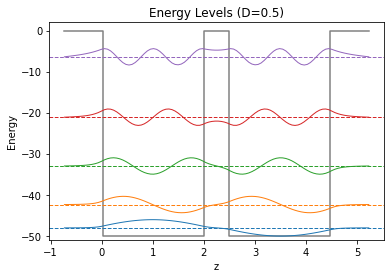

In [46]:
xd = np.linspace(0-1, 2*L+D+1, 11)
xd_plot = np.linspace(x1.min(), x1.max(), 100)
print(plt.ylim(-gamma-1,0+2))
plt.plot(xd_plot, V(xd_plot) ,drawstyle='steps-mid', c='k', alpha=0.5)

    
for soln in solnsd1:
    y_plot = soln.sol(xd_plot)[0]
    l = plt.plot(xd_plot, 2 * y_plot / y_plot.max() + soln.p[0],linewidth = 1)
    plt.axhline(soln.p[0], ls='--', c=l[0].get_color(),linewidth = 1)
    
    
#plt.axis(xmin=-5, xmax=5, ymin = -50-1, ymax = 1)
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x)$')
plt.title("Energy Levels (D=0.5)")
plt.xlabel("z")
plt.ylabel("Energy")
plt.savefig('schro.png',dpi=300,bbox_inches='tight')
plt.show()